In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
%matplotlib inline

In [3]:
# pip install geopandas plotly descartes

In [4]:
from matplotlib import pyplot as plt
from matplotlib import animation
import pandas as pd
import geopandas # we'll use this to read shapefiles
from shapely.geometry import Polygon, Point

In [5]:
city = geopandas.read_file("city")
city

DriverError: city: No such file or directory

In [ ]:
type(city.iloc[3,-1])

In [ ]:
city.iloc[3,-1]

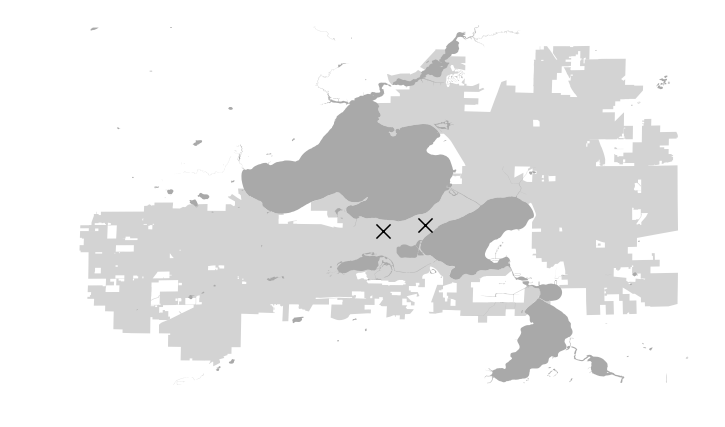

In [8]:
# lakes and city
city = geopandas.read_file("city")
lakes = geopandas.read_file("lakes2")
ax = city.plot(color="lightgray", figsize=(12,12))
lakes.plot(color="darkgray", ax=ax)

# custom points
buildings = pd.DataFrame([
    {"name":"cs", "loc": Point(-89.406749, 43.071478)},
    {"name":"capital", "loc": Point(-89.384054, 43.074617)},
])
buildings = geopandas.GeoDataFrame(buildings, geometry="loc")
buildings.plot(color="black", marker="x", markersize=200, ax=ax)

ax.set_axis_off()

In [19]:
city = geopandas.read_file("city")
lakes = geopandas.read_file("lakes2")

def draw_frame(ax, percent):
    ax.cla()
    # lakes and city
    city.plot(color="lightgray", figsize=(12,12), ax=ax)
    lakes.plot(color="darkgray", ax=ax)

    # custom points
    buildings = pd.DataFrame([
        {"name":"cs", "loc": Point(-89.406749 + percent*0.1, 43.071478)},
        {"name":"capital", "loc": Point(-89.384054, 43.074617 + percent*0.1)},
    ])
    buildings = geopandas.GeoDataFrame(buildings, geometry="loc")
    buildings.plot(color="black", marker="x", markersize=200, ax=ax, alpha=1-percent)

    ax.set_axis_off()

In [20]:
%%capture
fig, ax = plt.subplots()

In [22]:
SECONDS = 5
INTERVAL_MS = 50
TOTAL_FRAMES = int(SECONDS * 1000 / INTERVAL_MS)

def update(frame_num):
    draw_frame(ax, frame_num/TOTAL_FRAMES)
    
vid = animation.FuncAnimation(fig, update, frames=TOTAL_FRAMES, interval=INTERVAL_MS)
html = vid.to_html5_video()
HTML(html)

<Figure size 432x288 with 0 Axes>